## Project #2:

* Student name: Milena Afeworki
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni 
* Blog post URL:


# King County Housing Sale Prices

In this project I'm going to analyze the King's County housing data set listing various data points for property sales in the King's County area of Washington (centered around Seattle). I will be using Linear Regression to identify the most influential variables controlling sale price. For the purposes of this exercise, I will be working from the position as a consultant to a hypothetical Real Estate Agency interested in single falmily homes in the Seattle area. I will be using the OSEMN (Obtain, Scrub, Explore, Model, Interpret) Data Science process in this project.

## The Business Problem

The King's County data shows various figures of features for house sold in 2014 and 2015. As a consultant, I will try and identify the significant factors affecting the sale price of homes, so the agency could have a finest structure of how much a house entering the market would cost according to these specific factors. These factors will include location of the house, living area, number of bedrooms, grade/condition of the house etc. Such conceptual information could increase the agency's ability to provide valuable knowledge and information at each step for the clients while also coming up with an unbiased valuation of their home and help set a listing/buying price.

## Data Understanding

1. id - unique identified for a house 
2. Date - house was sold
3. Price - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
#first import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

## Obtain data

In [2]:
#read csv file in data frame df
df = pd.read_csv('data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Scrubbing the data
### Cleaning based on info
Key observations from here:

1. Datatype of date: String
2. Waterfront is missing values
3. Sqft_basement has a datatype of object
4. yr_renovated missing values
5. yr_renovated is float


#### Dealing with date column

In [4]:
df.date.value_counts()

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
3/8/2015       1
5/15/2015      1
2/15/2015      1
5/17/2014      1
1/17/2015      1
Name: date, Length: 372, dtype: int64


By looking at the most common values in the Date column, we see that houses seem to sold more in late spring and early summer. Lets take another look at this and see if we can extract the month in any way.

In [5]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

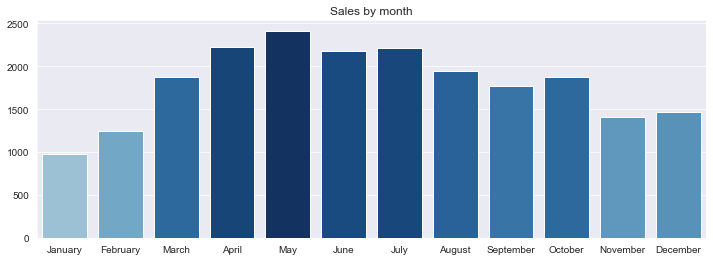

In [7]:
# fig = plt.figure(figsize=(8,5))
# sns.countplot(x = "month", data = df, color='g')

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.month == i))
    
plt.figure(figsize=(12,4))
norm = plt.Normalize(0,max(monthly_sales))
colors = plt.cm.Blues(norm(monthly_sales))

sns.barplot(months, monthly_sales, palette=colors)
plt.title('Sales by month')
plt.show()


So there appears to be certain months where more houses are sold. Lets take a look at the avg price of the homes during each month to see if there is any significant change by waiting to sell a house in the summer months.

In [8]:
df.groupby("month").median()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
month,,,,,,,,,,,,,,,,,,,
1,3.905036e+09,438500.0,3.0,2.25,1890.0,7800.0,1.0,0.0,0.0,3.0,7.0,1570.0,1974.0,0.0,98065.0,47.55950,-122.2310,1800.0,7700.0
2,3.997500e+09,426500.0,3.0,2.00,1830.0,7667.0,1.0,0.0,0.0,3.0,7.0,1489.0,1974.0,0.0,98059.0,47.56120,-122.2290,1800.0,7638.0
3,3.905040e+09,450000.0,3.0,2.25,1870.0,7560.0,1.0,0.0,0.0,3.0,7.0,1540.0,1973.0,0.0,98065.0,47.56480,-122.2260,1820.0,7647.0
4,4.022900e+09,477000.0,3.0,2.25,1900.0,7500.0,1.5,0.0,0.0,3.0,7.0,1540.0,1976.0,0.0,98072.0,47.56860,-122.2290,1840.0,7560.0
5,3.905005e+09,462000.0,3.0,2.25,1930.0,7498.0,1.0,0.0,0.0,3.0,7.0,1540.0,1974.0,0.0,98072.0,47.57870,-122.2365,1840.0,7551.5
6,3.904925e+09,465000.0,3.0,2.25,1980.0,7700.0,1.5,0.0,0.0,3.0,8.0,1600.0,1975.0,0.0,98072.0,47.57605,-122.2290,1890.0,7720.0
7,3.885801e+09,465000.0,3.0,2.25,1950.0,7695.0,1.5,0.0,0.0,3.0,8.0,1610.0,1977.0,0.0,98059.0,47.57400,-122.2150,1870.0,7650.0
8,4.016800e+09,442200.0,3.0,2.25,1940.0,7810.0,1.0,0.0,0.0,3.0,7.0,1590.0,1976.0,0.0,98059.0,47.57720,-122.2220,1860.0,7755.0
9,3.826501e+09,450000.0,3.0,2.25,1920.0,7620.0,1.5,0.0,0.0,3.0,7.0,1580.0,1974.0,0.0,98065.0,47.57400,-122.2350,1830.0,7503.0


In [9]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We don't seem to need the date for now since we have the month and the year.

In [12]:
df.drop('date', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

#### Dealing with missing values in waterfront

In [14]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [15]:
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
year                0
dtype: int64

About 2300 values missing from waterfront, but we only have 146 houses with a waterfront. We need to explore whether we even need to include this variable. Lets check the avg prices of homes with a waterfront vs ones without a waterfront.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

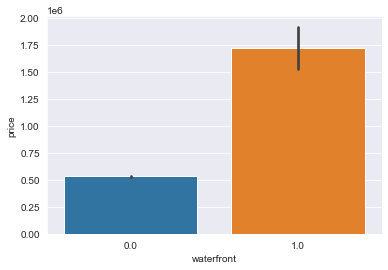

In [16]:
sns.barplot(x = "waterfront", y = "price", data = df)

As seen in the graph above there is a significant difference in the price of a house depending on whether it has a water front or not. I would want to keep this data and will fill the missing values with a random replication from the given data.

<AxesSubplot:xlabel='long', ylabel='lat'>

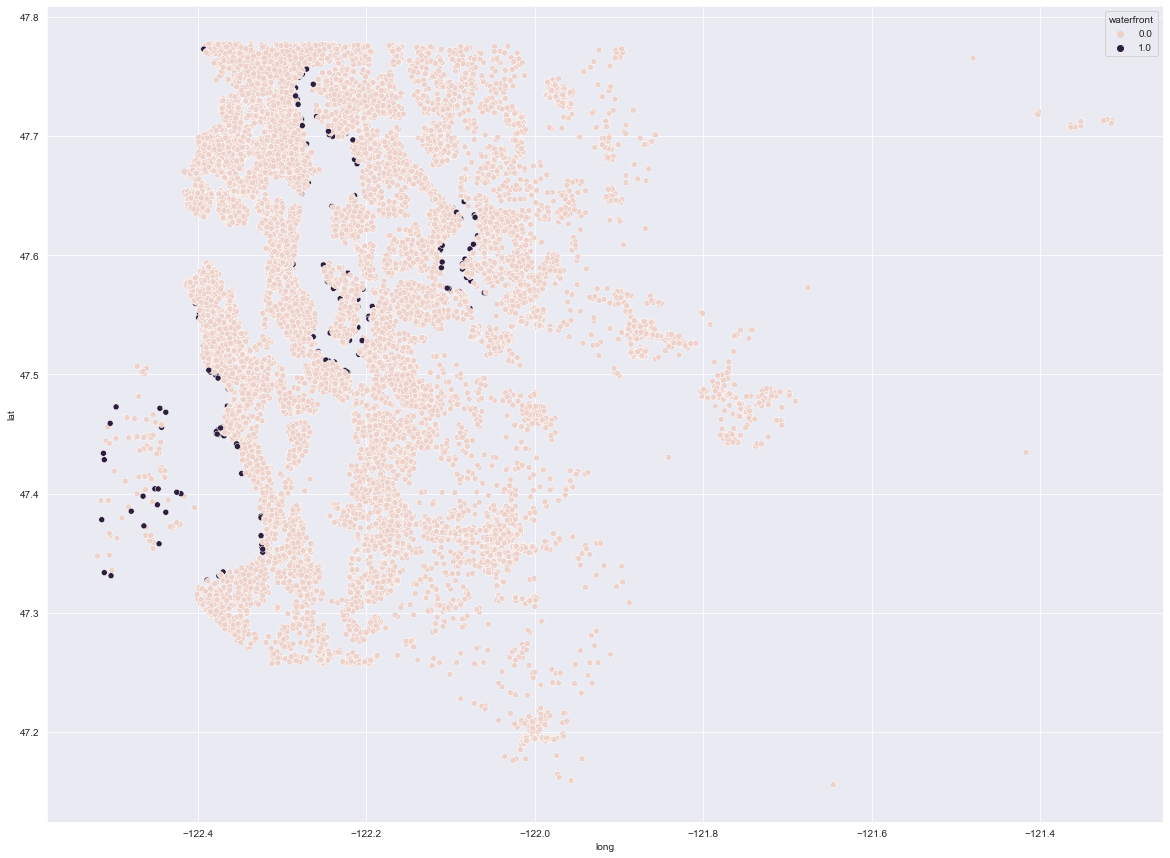

In [17]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

In [18]:
#replace missing values with random choice
s = df.waterfront.value_counts(normalize=True)
df['waterfront_fillna'] = df['waterfront']
df.loc[df.waterfront.isna(), 'waterfront_fillna'] = np.random.choice(s.index, p=s.values, size=df.waterfront.isna().sum())

In [19]:
df['waterfront_fillna'].value_counts(normalize = True)

0.0    0.992592
1.0    0.007408
Name: waterfront_fillna, dtype: float64


Now that we replicated the existing distribution of waterfront, we can drop the original column and rename the new one accordingly.

In [20]:
df.drop(columns=['waterfront'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   price              21597 non-null  float64
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_living        21597 non-null  int64  
 5   sqft_lot           21597 non-null  int64  
 6   floors             21597 non-null  float64
 7   view               21534 non-null  float64
 8   condition          21597 non-null  int64  
 9   grade              21597 non-null  int64  
 10  sqft_above         21597 non-null  int64  
 11  sqft_basement      21597 non-null  object 
 12  yr_built           21597 non-null  int64  
 13  yr_renovated       17755 non-null  float64
 14  zipcode            21597 non-null  int64  
 15  lat                21597 non-null  float64
 16  long               215

In [22]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'year', 'waterfront_fillna'],
      dtype='object')

In [23]:
df.columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'year', 'waterfront']

In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

<AxesSubplot:xlabel='long', ylabel='lat'>

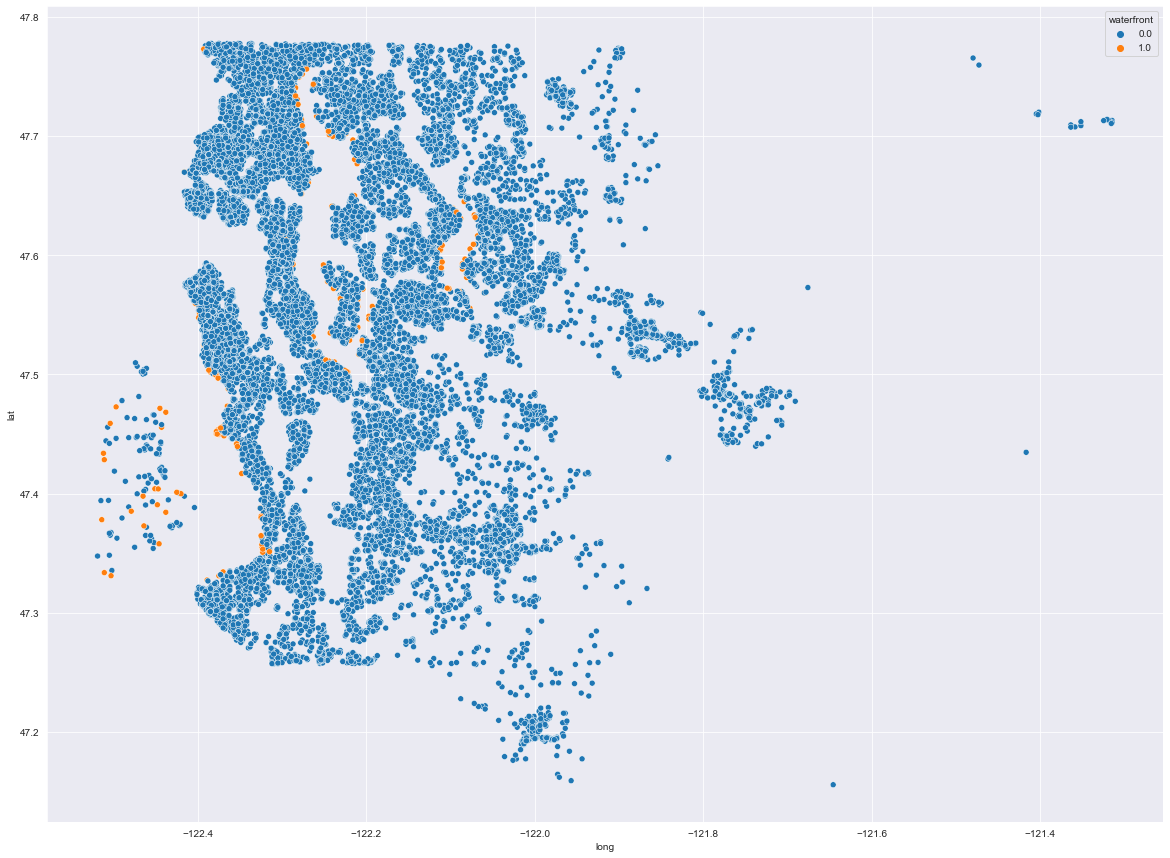

In [25]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

#### Dealing with sqft_basement data type

As we have seen in the info sqft_basement has an object data type. We can also notice that 454 values in the sqft_basement are missing and have the character '?' that needs to be taken care of.

In [26]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
274.0     0.000046
1248.0    0.000046
652.0     0.000046
2610.0    0.000046
915.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [27]:
#look for any other string types in the data that need to be changed
print(df.sqft_basement[pd.to_numeric(df.sqft_basement, errors='coerce').isnull()])


6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object


In [28]:
df['sqft_basement'] = pd.to_numeric(df.sqft_basement, errors='coerce')
df['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [29]:
df['sqft_basement'].isna().value_counts()

False    21143
True       454
Name: sqft_basement, dtype: int64

In [30]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.606631
600.0     0.010263
500.0     0.009885
700.0     0.009838
800.0     0.009507
            ...   
915.0     0.000047
295.0     0.000047
1281.0    0.000047
2130.0    0.000047
906.0     0.000047
Name: sqft_basement, Length: 303, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21143 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Now that we have taken care of the string the next step would be to deal with the missing values. From the data above since the median is 0 we are going to replace the nan values by 0 meaning those houses don't have a basement.

In [32]:
df.sqft_basement.fillna(value = 0.0, inplace=True)

In [33]:
df.sqft_basement.value_counts(normalize = True)

0.0       0.614900
600.0     0.010048
500.0     0.009677
700.0     0.009631
800.0     0.009307
            ...   
915.0     0.000046
295.0     0.000046
1281.0    0.000046
2130.0    0.000046
906.0     0.000046
Name: sqft_basement, Length: 303, dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

#### Dealing with the yr_renovated

Same way as above I will convert the yr_renovated float data type to int64.

In [35]:
df['yr_renovated'] = pd.to_numeric(df.yr_renovated, errors='coerce')
df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Looks like 18% of the data in yr_renovated is missing. I will assume all the null values to mean that those houses have never been renovated.

In [37]:
df.yr_renovated.fillna(value=0.0, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Taking a look at the scatter plot relationship between the yr_renovated and the price, as expected the price does increase as the houses are more recently renovated. And also observing the next plot, houses near the water front seem to be the latest renovated ones. Pretty much this could explain their prices being higher as well.

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

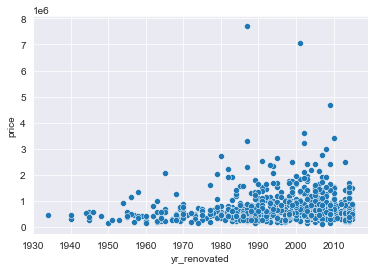

In [39]:
sns.scatterplot(x = "yr_renovated", y = "price", data = df[df['yr_renovated'] > 0])

<AxesSubplot:xlabel='long', ylabel='lat'>

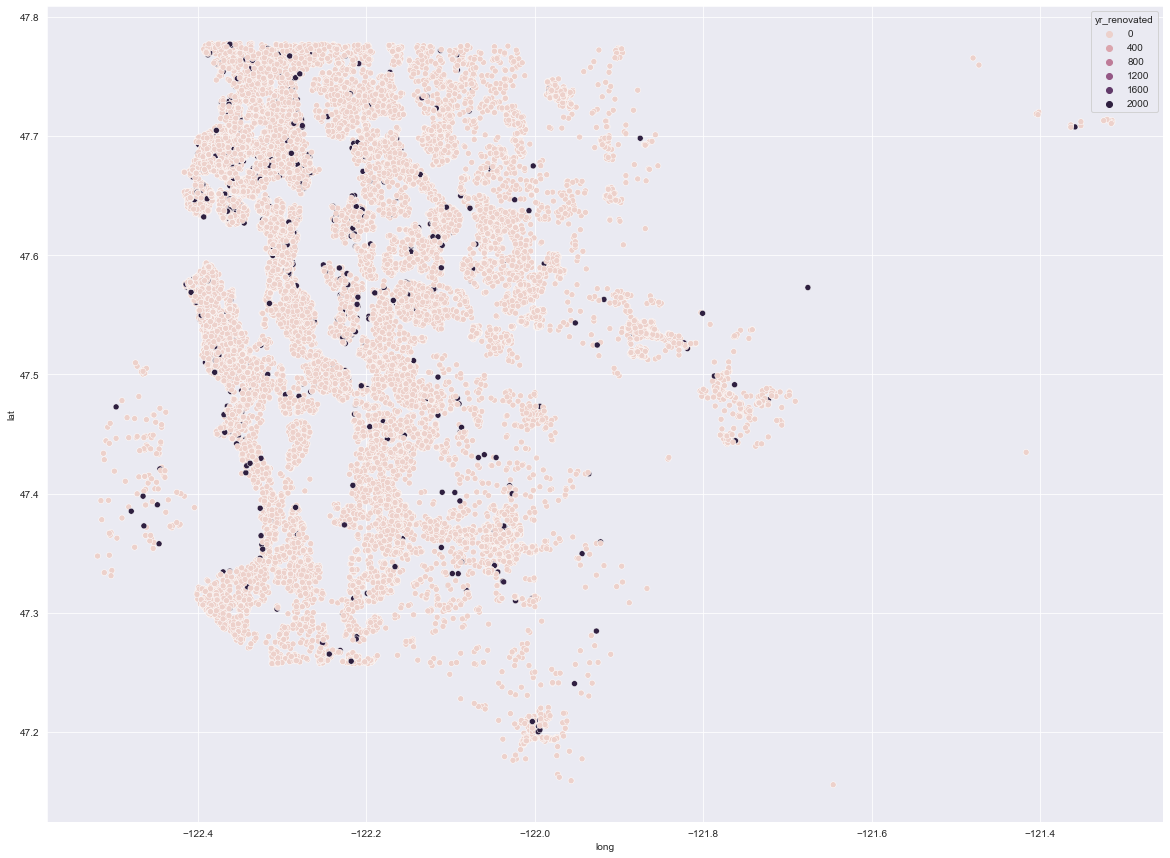

In [40]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "yr_renovated",  data = df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

#### Dealing with missing 'view' values

Scanning through the view column I have decided to just drop the na values since they are very small (0.3%) compared to our data.

In [42]:
df.dropna(inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   price          21534 non-null  float64
 2   bedrooms       21534 non-null  int64  
 3   bathrooms      21534 non-null  float64
 4   sqft_living    21534 non-null  int64  
 5   sqft_lot       21534 non-null  int64  
 6   floors         21534 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21534 non-null  int64  
 9   grade          21534 non-null  int64  
 10  sqft_above     21534 non-null  int64  
 11  sqft_basement  21534 non-null  float64
 12  yr_built       21534 non-null  int64  
 13  yr_renovated   21534 non-null  float64
 14  zipcode        21534 non-null  int64  
 15  lat            21534 non-null  float64
 16  long           21534 non-null  float64
 17  sqft_living15  21534 non-null  int64  
 18  sqft_l

## Exploring data

### Exploring zipcode

In this section I will explore if houses sold are concentrated in a specific zipcode and why it may be so. Also attempt to see if there is a relationship with the price of the house in a specific neighborhood that people are most interested in living.

<AxesSubplot:xlabel='long', ylabel='lat'>

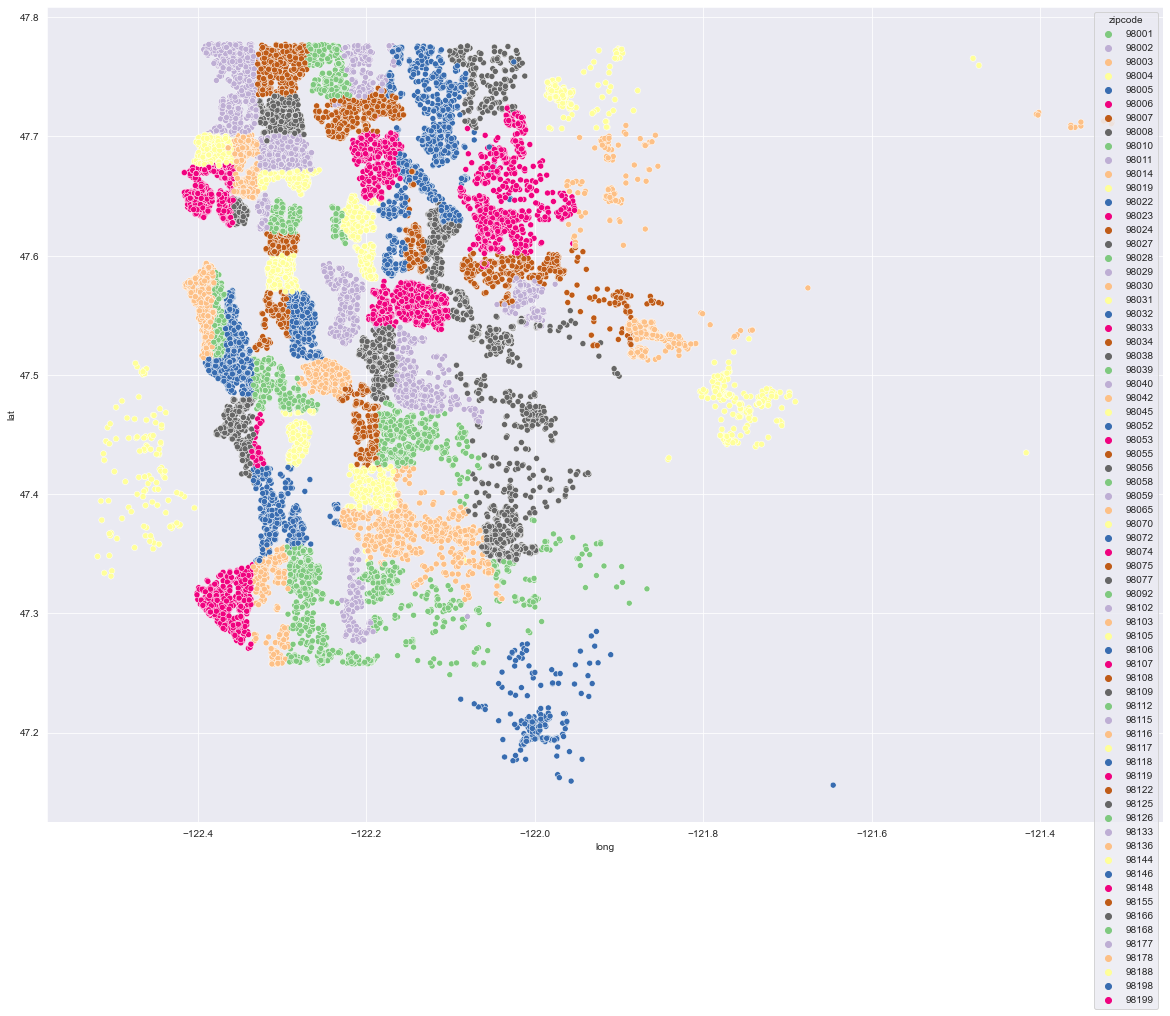

In [44]:
#section the map according to zipcode
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = 'zipcode', palette= 'Accent', data = df)

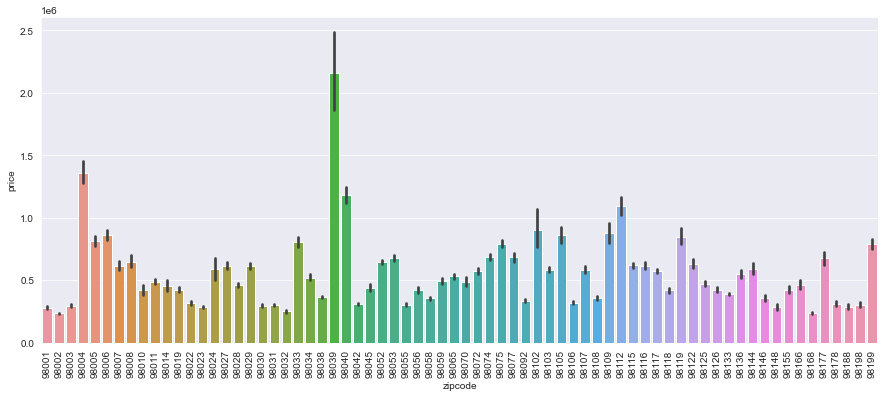

In [45]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(y = "price", x = "zipcode",  data = df[df['zipcode']>90000])
plt.xticks(rotation=90);

There are definitely particular neihbourhoods with distict range of prices which will be a good idea to explore and investigate some more in the modeling section of this project. In addition to that this next histogram also indicates zipcodes versus the number of houses sold. Clearly some neighbourhoods are have more trade volumes in the house transaction.

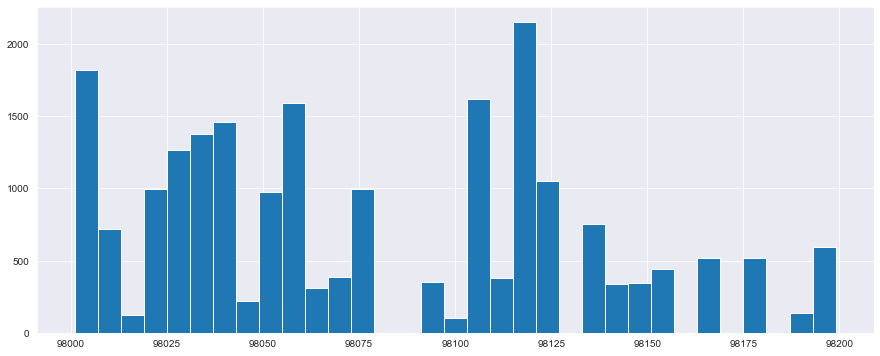

In [46]:
plt.figure(figsize=(15,6))
plt.hist('zipcode', bins='auto', data=df);

### Exploring Bedrooms

Checking out the bedrooms column in this next plot we have an unordinary observation. For one we notice a house of 33 bedrooms with a very low price and a low sqft_living area. And second thing is that the price seems to decline as the number of bedrooms increase from 5 onwards.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

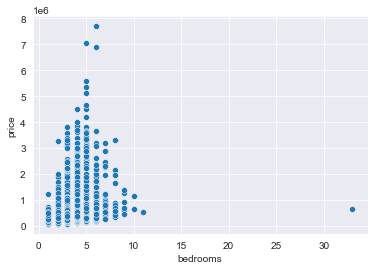

In [47]:
sns.scatterplot(y='price', x='bedrooms', data=df)

In [48]:
df.groupby(by='bedrooms').median()

,id,price,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,waterfront
bedrooms,,,,,,,,,,,,,,,,,,,,,
1,3.336702e+09,299000.0,1.00,790.0,5748.0,1.0,0.0,3.0,6.0,760.0,...,1939.5,0.0,98116.5,47.56225,-122.316,1360.0,5635.5,7.0,2014.0,0.0
2,3.904100e+09,374475.0,1.00,1140.0,5249.0,1.0,0.0,3.0,7.0,1010.0,...,1948.0,0.0,98116.0,47.60285,-122.316,1430.0,5400.0,6.0,2014.0,0.0
3,3.861500e+09,413000.0,2.00,1680.0,7622.0,1.0,0.0,3.0,7.0,1440.0,...,1976.0,0.0,98059.0,47.56520,-122.231,1720.0,7688.0,6.0,2014.0,0.0
4,4.036100e+09,549950.0,2.50,2410.0,8100.0,2.0,0.0,3.0,8.0,2080.0,...,1980.0,0.0,98056.0,47.57120,-122.192,2190.0,8000.0,6.0,2014.0,0.0
5,4.036700e+09,619500.0,2.75,2870.0,8930.5,2.0,0.0,3.0,8.0,2190.0,...,1975.0,0.0,98058.0,47.58325,-122.209,2280.0,8549.5,6.0,2014.0,0.0
6,3.876001e+09,650000.0,3.00,2955.0,8696.0,2.0,0.0,3.0,8.0,2340.0,...,1966.0,0.0,98097.0,47.60245,-122.269,2095.0,8241.0,6.0,2014.0,0.0
7,3.618730e+09,728580.0,3.50,3335.0,8836.0,2.0,0.0,3.0,8.0,2820.0,...,1964.5,0.0,98104.0,47.62120,-122.282,2215.0,8088.0,6.0,2014.0,0.0
8,3.756900e+09,700000.0,3.25,3840.0,7500.0,2.0,0.0,3.0,8.0,2530.0,...,1962.0,0.0,98105.0,47.63160,-122.303,1780.0,7624.0,10.0,2014.0,0.0
9,5.863050e+09,817000.0,4.25,3755.0,5254.0,2.0,0.0,3.0,7.0,2680.0,...,1916.5,0.0,98105.0,47.66290,-122.308,2210.0,4360.0,4.0,2014.5,0.0


Ok looks like starting from 10 bedrooms price actually goes down. Also it doesn't make sense that a 10 bedroom house would only have 3 bathrooms since the standard ratio of the number of bathrooms needed in a home is two for every three rooms.

So for our analysis lets just consider the houses with less than 9 bedrooms.

In [49]:
df = df[df['bedrooms'] < 9]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21523 non-null  int64  
 1   price          21523 non-null  float64
 2   bedrooms       21523 non-null  int64  
 3   bathrooms      21523 non-null  float64
 4   sqft_living    21523 non-null  int64  
 5   sqft_lot       21523 non-null  int64  
 6   floors         21523 non-null  float64
 7   view           21523 non-null  float64
 8   condition      21523 non-null  int64  
 9   grade          21523 non-null  int64  
 10  sqft_above     21523 non-null  int64  
 11  sqft_basement  21523 non-null  float64
 12  yr_built       21523 non-null  int64  
 13  yr_renovated   21523 non-null  float64
 14  zipcode        21523 non-null  int64  
 15  lat            21523 non-null  float64
 16  long           21523 non-null  float64
 17  sqft_living15  21523 non-null  int64  
 18  sqft_l

### Dealing with duplicates if any.

In this section I will investigate the 'id' column to see if we have any duplicates.

In [51]:
df.id.duplicated().sum()

177

Looks like we have duplicates of the ids and this could mean that some houses may have been sold multiple times. For my analysis I have decided to keep the duplicates to have further details on the trend of house price for my model. 

In [52]:
df.loc[df.id.duplicated()]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,waterfront
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0.0,3,8,...,1939,0.0,98117,47.6870,-122.386,1570,4500,12,2014,0.0
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,3.0,3,11,...,1997,0.0,98006,47.5503,-122.102,3860,11244,12,2014,0.0
325,7520000520,240500.0,2,1.00,1240,12092,1.0,0.0,3,6,...,1922,1984.0,98146,47.4957,-122.352,1820,7460,3,2015,0.0
346,3969300030,239900.0,4,1.00,1000,7134,1.0,0.0,3,6,...,1943,0.0,98178,47.4897,-122.240,1020,7138,12,2014,0.0
372,2231500030,530000.0,4,2.25,2180,10754,1.0,0.0,5,7,...,1954,0.0,98133,47.7711,-122.341,1810,6929,3,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,645000.0,4,3.50,2910,5260,2.0,0.0,3,9,...,2012,0.0,98065,47.5168,-121.883,2910,5260,2,2015,0.0
20597,2724049222,220000.0,2,2.50,1000,1092,2.0,0.0,3,7,...,2004,0.0,98118,47.5419,-122.271,1330,1466,12,2014,0.0
20654,8564860270,502000.0,4,2.50,2680,5539,2.0,0.0,3,8,...,2013,0.0,98045,47.4759,-121.734,2680,5992,3,2015,0.0
20764,6300000226,380000.0,4,1.00,1200,2171,1.5,0.0,3,7,...,1933,0.0,98133,47.7076,-122.342,1130,1598,5,2015,0.0


### Dealing with price range for our spectrum of interest

Since we are working on creating a model to best fit our data for a realestate agency that buys and sells single family houses we are goung to assume for our calculations that the highest price for our analysis will be 1million. Why? Because according to recent studies of ***Norada Real Estate Investments*** on housing, prices in King County continues to have the highest median price for homes and condos surged across most King County markets, with the typical Seattle single-family home selling for $805,000 as prices rose 6.6% from a year ago.

In [53]:
df.price.describe()

count    2.152300e+04
mean     5.399163e+05
std      3.660333e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [54]:
df.loc[df['price']<1850000, 'waterfront'].value_counts(normalize=False)

0.0    21142
1.0      105
Name: waterfront, dtype: int64

Since we have only 164 houses with waterfronts considering all of them would take us over board with the price for a single family home. Therefore, I will try to include atleast two third of them (109) in my price limit. 

In [55]:
df = df.loc[df['price']<1850000]
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,waterfront
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,0.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,...,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014,0.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015,0.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,...,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014,0.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,...,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015,0.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21247 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21247 non-null  int64  
 1   price          21247 non-null  float64
 2   bedrooms       21247 non-null  int64  
 3   bathrooms      21247 non-null  float64
 4   sqft_living    21247 non-null  int64  
 5   sqft_lot       21247 non-null  int64  
 6   floors         21247 non-null  float64
 7   view           21247 non-null  float64
 8   condition      21247 non-null  int64  
 9   grade          21247 non-null  int64  
 10  sqft_above     21247 non-null  int64  
 11  sqft_basement  21247 non-null  float64
 12  yr_built       21247 non-null  int64  
 13  yr_renovated   21247 non-null  float64
 14  zipcode        21247 non-null  int64  
 15  lat            21247 non-null  float64
 16  long           21247 non-null  float64
 17  sqft_living15  21247 non-null  int64  
 18  sqft_l

Taking one more look at the price distribution across our zipcodes now that we have changed the maximum limit for the sales price.

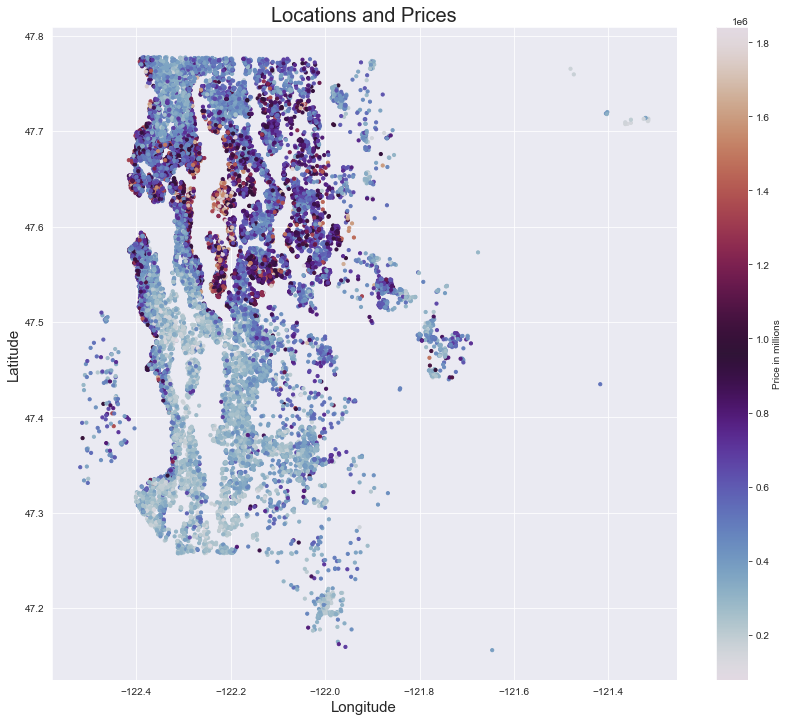

In [57]:
#plotting a Scatterplot of king county, longitude with latitude on the price range
plt.figure(figsize=(14,12))
plt.scatter(x='long', y='lat', c='price' , data=df, s=10, cmap='twilight')
plt.colorbar().set_label('Price in millions')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Locations and Prices', fontsize=20)

plt.show()


### Exploring correlation of data

Let's look at the scatter plot and explore the heat map to have a better understanding of the relationship our variables have with one another.

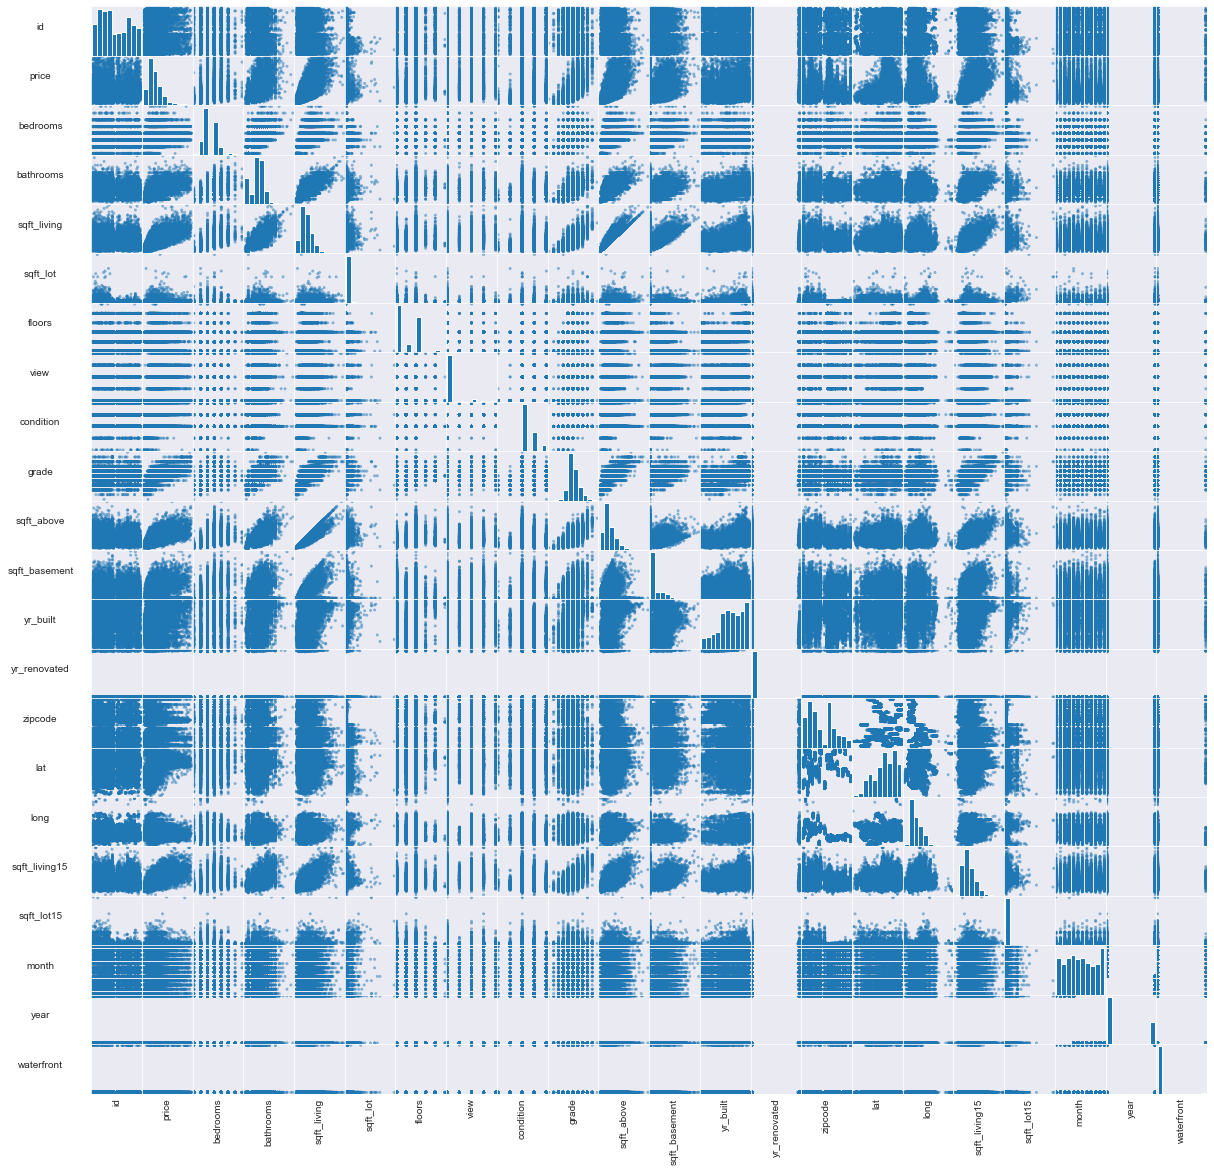

In [58]:
# create scatter plot for each column
sm = pd.plotting.scatter_matrix(df, figsize = [20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1, 0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()


<AxesSubplot:>

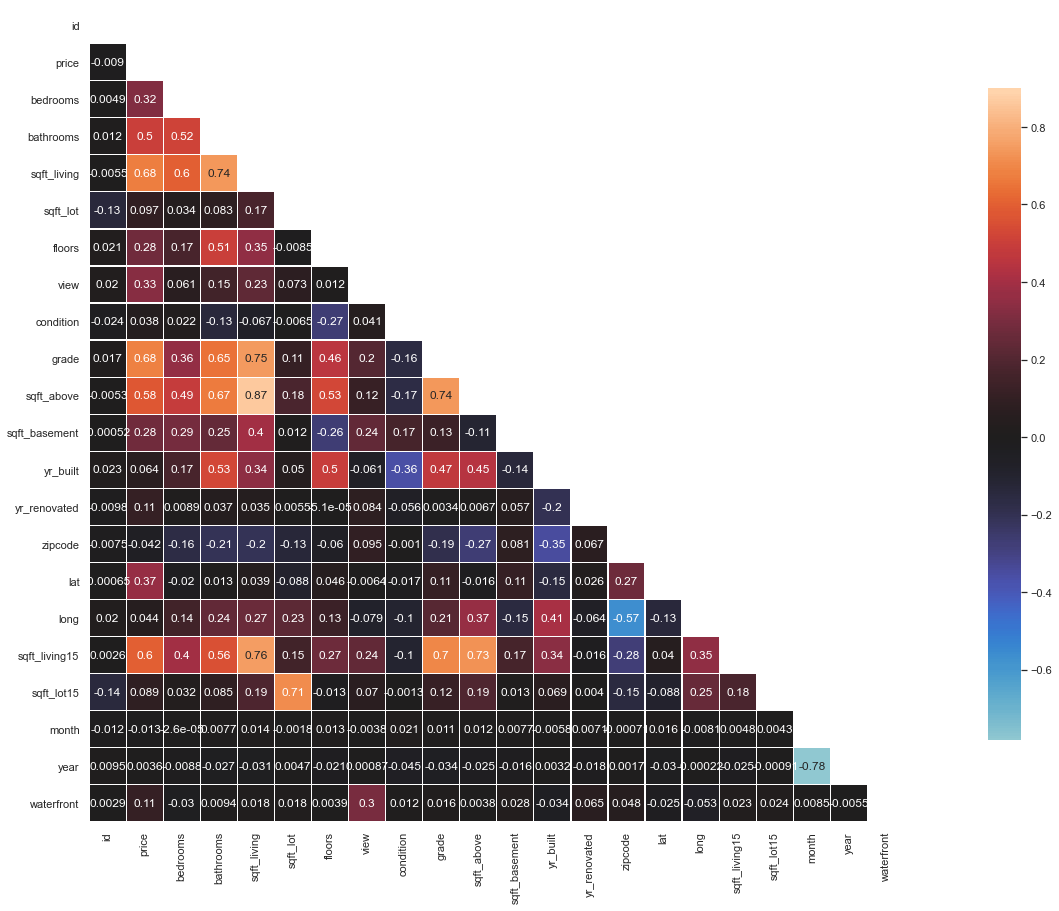

In [59]:

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=0.9, center=0, annot=True, square=True,
            linewidth=.25, cbar_kws={"shrink": .8})

In [60]:
#droping the sqft_above column since it is highly correlated with sqft_living and 
#and it is irrelevant to our analysis as compared
df.drop(columns=["sqft_above"], inplace= True, axis = 1)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21247 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21247 non-null  int64  
 1   price          21247 non-null  float64
 2   bedrooms       21247 non-null  int64  
 3   bathrooms      21247 non-null  float64
 4   sqft_living    21247 non-null  int64  
 5   sqft_lot       21247 non-null  int64  
 6   floors         21247 non-null  float64
 7   view           21247 non-null  float64
 8   condition      21247 non-null  int64  
 9   grade          21247 non-null  int64  
 10  sqft_basement  21247 non-null  float64
 11  yr_built       21247 non-null  int64  
 12  yr_renovated   21247 non-null  float64
 13  zipcode        21247 non-null  int64  
 14  lat            21247 non-null  float64
 15  long           21247 non-null  float64
 16  sqft_living15  21247 non-null  int64  
 17  sqft_lot15     21247 non-null  int64  
 18  month 

In [62]:
df.to_csv("house_sale_cleaned.csv", index=False)

In [63]:
df['bathrooms'].value_counts()

2.50    5334
1.00    3841
1.75    3031
2.25    2027
2.00    1924
1.50    1441
2.75    1173
3.00     729
3.50     700
3.25     540
3.75     136
4.00     110
4.50      81
0.75      71
4.25      55
5.00      15
4.75      10
1.25       9
5.25       7
5.50       4
0.50       4
6.00       2
5.75       1
6.75       1
6.50       1
Name: bathrooms, dtype: int64